# 1.Support Vector Machines (SVM) 
Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression.Its primary goal is to find the optimal hyperplane that separates data into different classes with the maximum possible margin.

## 1.1 Key Terminology
### Hyperplane: 
In 2D, it's a line. In 3D, it's a plane. In $n$-dimensions, it’s a decision boundary that separates classes.
### Support Vectors: 
The data points closest to the hyperplane.These are the "critical" points,if we move them, the boundary moves.
### Margin: 
The distance between the hyperplane and the nearest support vector.SVM aims to maximize this margin.
### Hard Margin: 
Works only when data is perfectly separable. No misclassifications allowed.
### Soft Margin:
Allows some misclassifications (using a slack variable) to handle noisy data or outliers. Controlled by the parameter
### The Kernel Trick:
When data is not linearly separable (e.g., a circle inside a square), we use Kernels to project data into a higher dimension where a linear separation is possible.
Linear Kernel: For linearly separable data.
Polynomial Kernel: For curved boundaries.
RBF (Radial Basis Function): The most popular; handles complex, overlapping boundaries.
Mathematical IntuitionDecision Boundary: $w \cdot x + b = 0$Hinge Loss: Penalizes points that are on the wrong side of the margin:$$\text{Loss} = \max(0, 1 - y_i(w \cdot x_i + b))$$

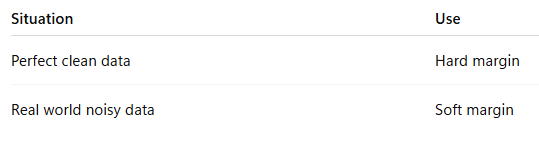 

**Python example: visualize line**

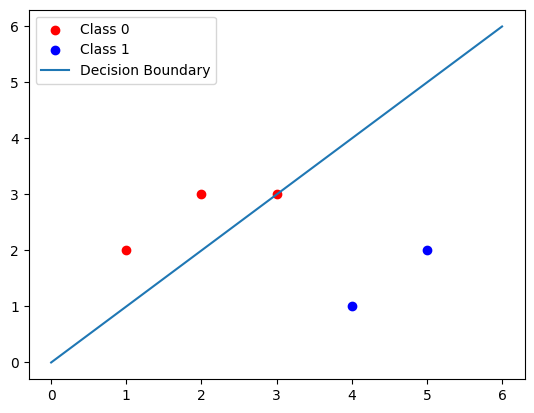

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple dataset
X = np.array([[1,2],[2,3],[3,3],[4,1],[5,2]])
y = np.array([0,0,0,1,1])

# Plot data
plt.scatter(X[y==0][:,0], X[y==0][:,1], c='red', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='blue', label='Class 1')

# Plot a decision line: x2 = -w1/w2*x1 - b/w2
w = np.array([1, -1])
b = 0
x1 = np.linspace(0,6,100)
x2 = -(w[0]*x1 + b)/w[1]
plt.plot(x1, x2, label='Decision Boundary')
plt.legend(); plt.show()       

**Simple Linear SVM implemented from scratch using numpy (Hard-margin).Supports 2D datasets with -1, 1 labels.**

In [2]:
import numpy as np
x=np.array([[1,2],[2,3],[3,3],[2,1],[3,2],[1,1]])
y = np.array([1, 1, 1, -1, -1, -1])

w=np.zeros(2)
ir=0.01
epochs=100
b=0
for j in range(epochs):
    for i in range(len(x)):
        condition=y[i]*(np.dot(x[i],w)+b)
        
        if condition<1:
            w=w+ir*y[i]*x[i]
            b=b+ir*y[i]
            
print("Final weights:", w)
print("Final bias:", b)

def predict(x):
    return np.sign(np.dot(x,w)+b)

print("Prediction of [3,3]:", predict(np.array([3,3])))
print("Prediction of [1,1]:", predict(np.array([1,1])))
           
        


Final weights: [-1.1   1.41]
Final bias: -0.6800000000000004
Prediction of [3,3]: 1.0
Prediction of [1,1]: -1.0


#### 1.2 note
**Regularization only applies to w**

**Hinge loss is zero when condition ≥ 1**

**So gradient w.r.t b = 0**

**In SVM, Lambda is the regularization parameter that balances the trade-off between maximizing the margin and minimizing classification errors.A small lambda (e.g., 0.01) forces the model to classify training points strictly and correctly,leading to a narrower "Hard Margin."A large lambda** **prioritizes a wider "Soft Margin" even if it misclassifies some points, which helps the model generalize better to new data.In code, it acts as a penalty that prevents the weights from becoming too large, effectively preventing overfitting.**

In [ ]:
import numpy as np
# Data

x = np.array([[1,2],[2,3],[3,3],[2,1],[3,2],[1,1]])

y = np.array([1, 1, 1, -1, -1, -1])

# Initialize

w = np.zeros(2)

b = 0

lr = 0.01

epochs = 100

lambda_param = 0.01   # regularization strength



# Training

for _ in range(epochs):

    for i in range(len(x)):

        

        condition = y[i] * (np.dot(x[i], w) + b)

        

        if condition >= 1:

            # Only regularization

            w = w - lr * (2 * lambda_param * w)

        else:

            # Regularization + hinge gradient

            w = w - lr * (2 * lambda_param * w - y[i] * x[i])

            b = b + lr * y[i]



print("Final weights:", w)

print("Final bias:", b)

# Prediction

def predict(x_input):

    return np.sign(np.dot(x_input, w) + b)



print("Prediction of [3,3]:", predict(np.array([3,3])))

print("Prediction of [1,1]:", predict(np.array([1,1])))



Final weights: [-1.08527418  1.38231971]
Final bias: -0.6600000000000004
Prediction of [3,3]: 1.0
Prediction of [1,1]: -1.0


 #### 1.3 note
 #### Only Regularization:
 **This occurs when a point is correctly classified and is outside the margin yi*(w.X[i]+b)>=1; here, the model only shrinks the weights to keep the margin as wide as possible.**
 #### Reg + Hinge Loss:
  **This occurs when a point is misclassified or falls inside the margin; the model then updates the weights to both penalize the classification error (Hinge Loss) and maintain the margin (Regularization).**

#### 1.4 note
**If weights become very big, the model becomes too sensitive to small changes in input. This can cause overfitting, where the model memorizes training data but performs poorly on new data. Large weights also create a very small margin, making the classifier less stable and less robust to noise. Regularization keeps weights small and the model simple. Hinge loss helps correct misclassified points, so together they create a balanced and well-generalized model.**

**basic PyTorch soft-margin SVM**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Data
X = torch.tensor([[1.,2.],[2.,3.],[3.,3.],[2.,1.],[3.,2.],[1.,1.]])
y = torch.tensor([1.,1.,1.,-1.,-1.,-1.])

model = nn.Linear(2,1)                      # Linear SVM
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01) #weight_decay=0.01 → tells PyTorch: add L2 regularization automatically

for _ in range(3000):
    optimizer.zero_grad()
    output = model(X).squeeze() #It's forward pass.PyTorch models often output results with an extra "1" dimension that doesn't match the shape of target labels.squeeze() removes that unnecessary dimension, turning a 2D "column" into a 1D "list.((6,1) into (6,))"
    loss = torch.mean(torch.clamp(1 - y*output, min=0))  # Hinge loss  torch.clamp(..., min=0) → forces negative values to 0, leaves positive and indicates that loss is 0 and this sample is correctly classified.if one output is 2 then 1-1*2=-1 which is negative and the point is correctly classified and loss is 0. If output is 0.5 then 1-1*0.5=0.5 which is positive and the point is misclassified and loss is 0.5.
    loss.backward()  #PyTorch automatically calculates gradient of loss w.r.t all parameters (w1,w2,b)
    optimizer.step() #Updates weights in the correct direction to reduce hinge loss.  w=w−lr∗grad−lr∗weight_decay∗w
    #The total loss in SVM is Loss=Hinge loss+0.5*lembda*||w||^2

print("Prediction:", torch.sign(model(X).squeeze()))

Prediction: tensor([ 1.,  1.,  1., -1., -1., -1.], grad_fn=<SignBackward0>)


#### 1.5 note
PyTorch Basics for SVM

**1.nn.Linear(in_features, out_features) → creates a linear layer: y=w⋅x+b**

**2.model.parameters() → gets all parameters (weights and bias) for the optimizer**

**3.optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01) → creates an optimizer using Stochastic Gradient Descent**

**lr → learning rate (step size for updates) weight_decay → L2 regularization (keeps weights small, improves generalization)**

**4.torch.clamp(1 - y*output, min=0) → calculates hinge loss for each sample**

**forces negative values to 0 → correctly classified points give 0 loss**

**positive values → misclassified or inside margin → non-zero loss**

**5.torch.mean → averages over all samples**

**6.loss.backward() → computes gradients of this loss w.r.t model parameters (weights w and bias b)**

**7.optimizer.step() → updates weights using computed gradients and weight_decay automatically**

**8.optimizer.zero_grad() → clears old gradients before next iteration (important to avoid accumulation)**

**9.squeeze() → removes extra dimensions from output tensor,shape [6,1] → [6]**

**10.Prediction → torch.sign(model(X)) returns +1 or -1 based on which side of the hyperplane the point is**


#### 1.6 note
**SVM is trying to maximize margin. Early in training, it might not find the best hyperplane.**

**With more training, soft-margin SVM settles into a better boundary, and misclassifications reduce (if data is separable enough).**

**This is why epoch number matters, especially for small datasets and hand-coded gradient updates.**

## 2.Kernel Trick in SVM 
The Kernel Trick is a mathematical technique that allows SVM to find non-linear decision boundaries in the original feature space without explicitly computing the transformation to higher dimensions.It allows SVM to create non-linear decision boundary by computing dot products in a transformed high-dimensional space without explicitly mapping the data.

**The Problem:**

*Real-world data is often not linearly separable

*We could map data to higher dimensions (explicitly), but that's computationally expensive

*Curse of dimensionality" makes explicit mapping impractical

**The Solution:**

The kernel trick uses a kernel function K(xᵢ, xⱼ) that computes the dot product in high-dimensional space without ever performing the actual transformation.

**Popular Kernel Functions:**

1.Linear Kernel
K(xi, xj) = xi · xj

2.Polynomial Kernel  
K(xi, xj) = (xi · xj + c)ᵈ

3.RBF (Radial Basis Function) Kernel
K(x, y) = exp(-γ||x - y||²)

4.Sigmoid Kernel
K(x, y) = tanh(αx · y + c)

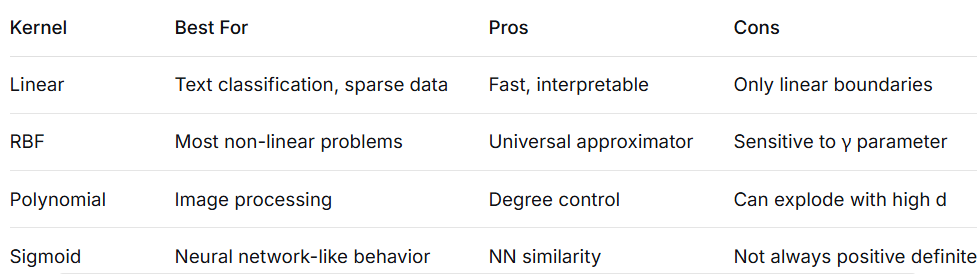

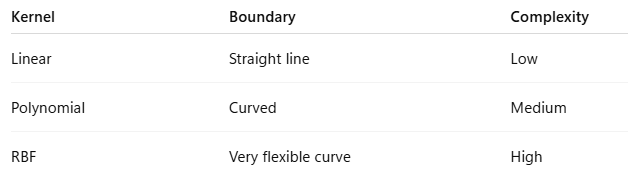


**Visual Intuition:**

Original Space (2D)[Non-separable] → High-Dim Space (3D)[Becomes separable] → Decision Boundary[Projects back as non-linear]


**Visualizatiion of linear,polynomial,RBF(Radial Basis Function) using sklearn**

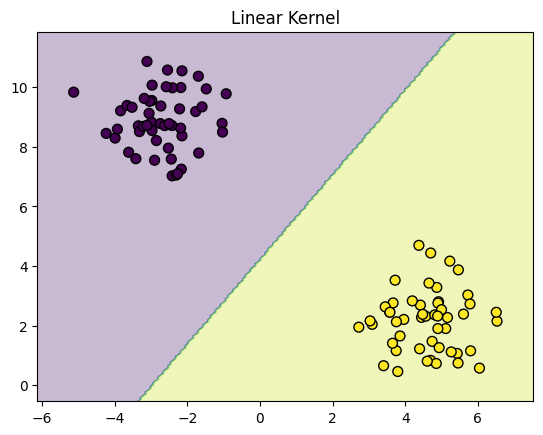

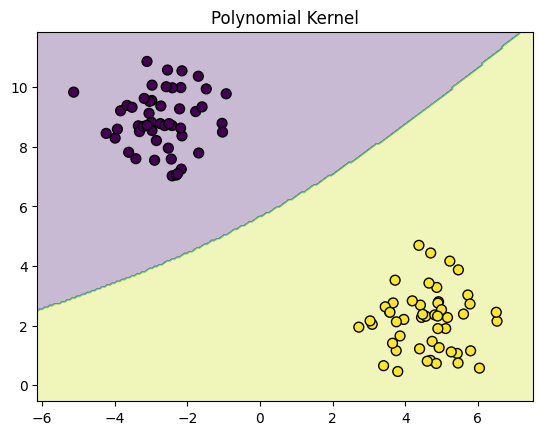

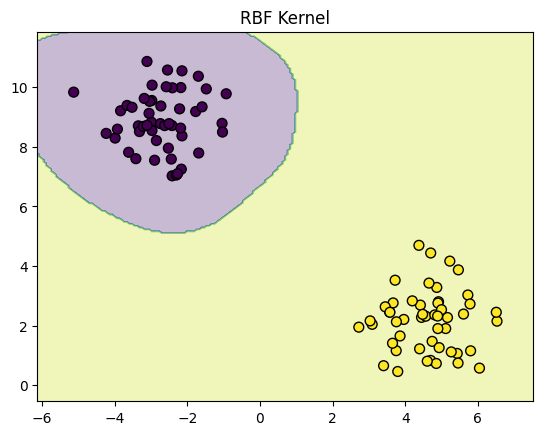

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Dummy 2D dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# 1️⃣ Linear SVM
linear_model = SVC(kernel='linear')
linear_model.fit(X, y)

# 2️⃣ Polynomial SVM (degree=3)
poly_model = SVC(kernel='poly', degree=3, coef0=1)
poly_model.fit(X, y)

# 3️⃣ RBF SVM
rbf_model = SVC(kernel='rbf', gamma=1)
rbf_model.fit(X, y)

# Function to plot decision boundary
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,200), np.linspace(y_min,y_max,200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=50, edgecolor='k')
    plt.title(title)
    plt.show()

# Plot boundaries
plot_boundary(linear_model, X, y, "Linear Kernel")
plot_boundary(poly_model, X, y, "Polynomial Kernel")
plot_boundary(rbf_model, X, y, "RBF Kernel")


**Accuracy test using SVM on iris dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
iris=load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


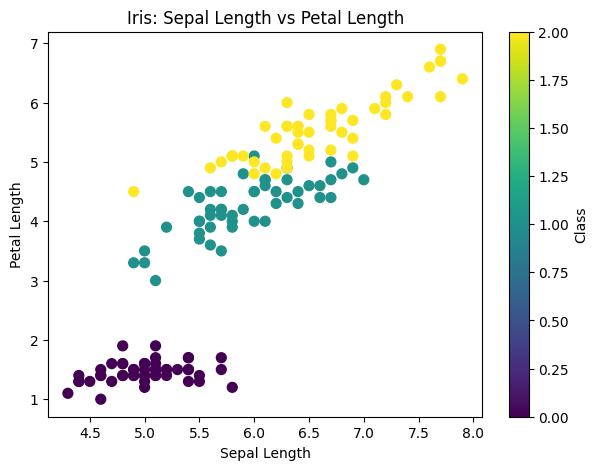

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

sepal_length = iris['data'][:,0]
petal_length = iris['data'][:,2]
sepal_width = iris['data'][:,1]
petal_width = iris['data'][:,3]

c = iris['target']

# Example: sepal_length vs petal_length
plt.figure(figsize=(7,5))
plt.scatter(sepal_length, petal_length, c=c, cmap='viridis', s=50)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris: Sepal Length vs Petal Length')
plt.colorbar(label='Class')
plt.show()

In [19]:
c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
x=np.column_stack((sepal_length,petal_length,sepal_width,petal_width))
y=iris['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=svm.SVC(kernel='linear')
model.fit(x_train, y_train)

print("Test accuracy:", model.score(x_test, y_test))
print("Train accuracy:", model.score(x_train, y_train))

Test accuracy: 1.0
Train accuracy: 0.9714285714285714


<Axes: >

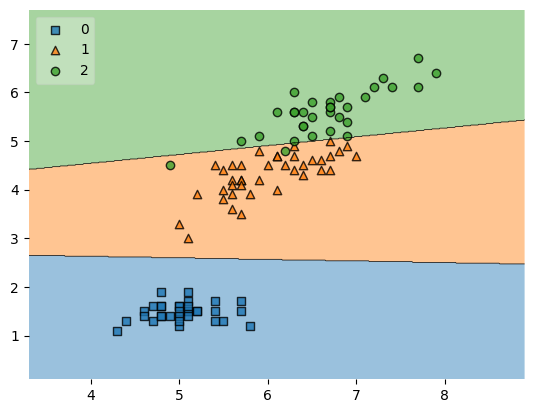

In [7]:
plot_decision_regions(x_train, y_train, clf=model, legend=2)